# 线性回归（单变量）
预测food truck的收益值。
ex1data1.txt：数据集，第一列表示城市人数，第二列该城市的food truck收益

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


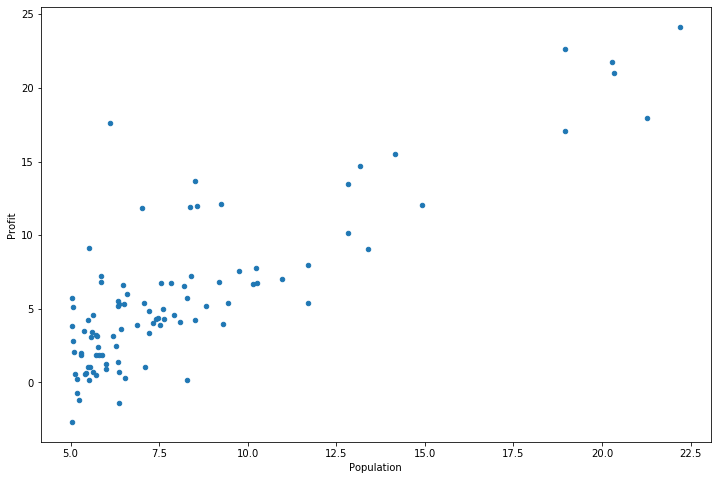

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

In [5]:
# 新增一例，x0
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [6]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
Y = data.iloc[:, cols-1:cols]

X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta = np.matrix(np.array([0, 0]))

In [7]:
# 代价函数
def computeCost(X, Y, theta):
    inner = np.power((X * theta.T) - Y, 2)
    return np.sum(inner) / (2 * len(X))

## 正则方程

![](img/regularization.png)

In [8]:
def normalEqn(X, Y):
    theta = np.linalg.inv(X.T@X)@X.T@Y
    return theta

In [9]:
theta = normalEqn(X, Y)
# 梯度下降的theta为 matrix([[-3.24140214,  1.1272942 ]])
theta

matrix([[-3.89578088],
        [ 1.19303364]])

In [10]:
# 梯度下降的cost为 4.515955503078912
computeCost(X, Y, theta.reshape(1, -1))

4.476971375975179

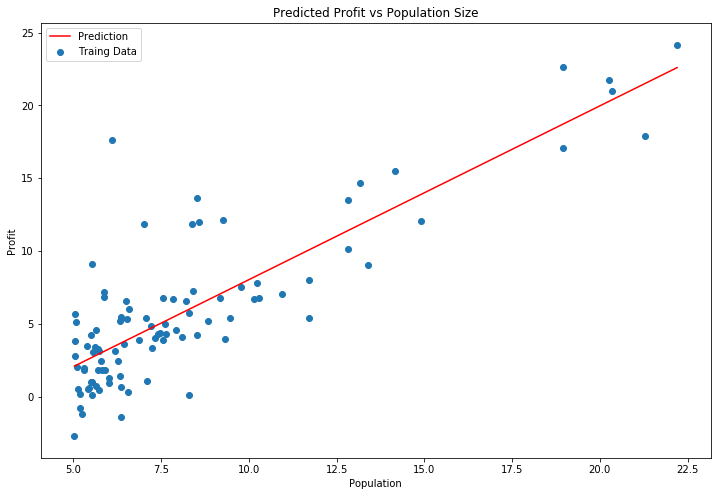

In [11]:
# 画出拟合图像
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta[0,0] + theta[1,0] * x

plt.figure(figsize=(12, 8))
plt.xlabel('Population')
plt.ylabel('Profit')
l1 = plt.plot(x, f, label='Prediction', color='red')
l2 = plt.scatter(data.Population, data.Profit, label='Traing Data', )
plt.legend(loc='best')
plt.title('Predicted Profit vs Population Size')
plt.show()